# Logistic Regression

When data scientists may come across a new classification problem, the first algorithm that may come across their mind is **Logistic Regression**. It is a supervised learning classification algorithm which is used to predict observations to a discrete set of classes. Practically, it is used to classify observations into different categories. Hence, its output is discrete in nature. **Logistic Regression** is also called **Logit Regression**. It is one of the most simple, straightforward and versatile classification algorithms which is used to solve classification problems.

In statistics, the **Logistic Regression model** is a widely used statistical model which is primarily used for classification purposes. It means that given a set of observations, Logistic Regression algorithm helps us to classify these observations into two or more discrete classes. So, the target variable is discrete in nature.

The Logistic Regression algorithm works as follows:

### 1. Implement linear equation


Logistic Regression algorithm works by implementing a linear equation with independent or explanatory variables to predict a response value. For example, we consider the example of number of hours studied and probability of passing the exam. Here, number of hours studied is the explanatory variable and it is denoted by x1. Probability of passing the exam is the response or target variable and it is denoted by z.


If we have one explanatory variable ($x_1$) and one response variable ($z$), then the linear equation would be given mathematically with the following equation-

$$
    z = β_0 + β_1x_1
$$

Here, the coefficients $β_0$ and $β_1$ are the parameters of the model.


If there are multiple explanatory variables, then the above equation can be extended to

$$
    z = β_0 + β_1x_1+ β_2x_2+...+β_nx_n
$$
    
Here, the coefficients $β_0$, $β_1$, $β_2$ and $β_n$ are the parameters of the model.

So, the predicted response value is given by the above equations and is denoted by $z$.

#### NOTE: What is the difference between Linear and Logistic Regression?

While Linear Regression is suited for estimating continuous values (e.g. estimating house price), it is not the best tool for predicting the class of an observed data point. In order to estimate the class of a data point, we need some sort of guidance on what would be the <b>most probable class</b> for that data point. For this, we use <b>Logistic Regression</b>.

<div class="alert alert-success alertsuccess" style="margin-top: 20px">
<font size = 3><strong>Recall linear regression:</strong></font>
<br>
<br>
    As you know, <b>Linear regression</b> finds a function that relates a continuous dependent variable, <b>y</b>, to some predictors (independent variables $x_1$, $x_2$, etc.). For example, simple linear regression assumes a function of the form:
<br>
$$
y = \beta_0 + \beta_1  x_1 + \beta_2  x_2 + \cdots
$$
<br>
and finds the values of parameters $\beta_0, \beta_1, \beta_2$, etc, where the term $\beta_0$ is the "intercept". It can be generally shown as:
<br>
$$
ℎ_\beta(𝑥) = \beta^TX
$$
<p></p>

</div>

### 2. Sigmoid Function

This predicted response value, denoted by $z$ is then converted into a probability value that lie between 0 and 1. We use the sigmoid function in order to map predicted values to probability values. This sigmoid function then maps any real value into a probability value between $0$ and $1$.

In machine learning, sigmoid function is used to map predictions to probabilities. The sigmoid function has an $S$ shaped curve. It is also called sigmoid curve.

A Sigmoid function is a special case of the Logistic function. It is given by the following mathematical formula.

Graphically, we can represent sigmoid function with the following graph:

![Sigmoid Function](https://miro.medium.com/max/970/1*Xu7B5y9gp0iL5ooBj7LtWw.png)

So, briefly, Logistic Regression passes the input through the logistic/sigmoid but then treats the result as a probability:

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/images/mod_ID_24_final.png" width="500" align="center">

The objective of the **Logistic Regression** algorithm, is to find the best parameters in such a way that the model best predicts the class of each case.

### 3. Decision boundary

The sigmoid function returns a probability value between $0$ and $1$. This probability value is then mapped to a discrete class which is either "0" or "1". In order to map this probability value to a discrete class (pass/fail, yes/no, true/false), we select a threshold value. This threshold value is called Decision boundary. Above this threshold value, we will map the probability values into class 1 and below which we will map values into class 0.

Mathematically, it can be expressed as follows:

$p ≥ 0.5$ => class = 1

$p < 0.5$ => class = 0

Generally, the decision boundary is set to 0.5. So, if the probability value is 0.8 (> 0.5), we will map this observation to class 1. Similarly, if the probability value is 0.2 (< 0.5), we will map this observation to class 0. This is represented in the graph below:

![Decision boundary in sigmoid function](https://ml-cheatsheet.readthedocs.io/en/latest/_images/logistic_regression_sigmoid_w_threshold.png)

## Types of Logistic Regression

Logistic Regression model can be classified into three groups based on the target variable categories. These three groups are described below:-

### 1. Binary Logistic Regression

In Binary Logistic Regression, the target variable has **two possible categories**. The common examples of categories are yes or no, good or bad, true or false, ``spam`` or ``no spam`` and ``pass`` or ``fail``.


### 2. Multinomial Logistic Regression

In Multinomial Logistic Regression, the target variable has three or more categories which are not in any particular order. So, there are three or more nominal categories. The examples include the type of categories of fruits - ``apple``, ``mango``, ``orange`` and ``banana``.


### 3. Ordinal Logistic Regression

In Ordinal Logistic Regression, the target variable has three or more ordinal categories. So, there is intrinsic order involved with the categories. For example, the student performance can be categorized as ``poor``, ``average``, ``good`` and ``excellent``.


## Making predictions with Logistic Regression

A telecommunications company is concerned about the number of customers leaving their land-line business for cable competitors. They need to understand who is leaving. Imagine that you are an analyst at this company and you have to find out who is leaving and why.

In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

#Load Data From CSV File
churn_df = pd.read_csv("ChurnData.csv")
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


### Dataset information

We will use a telecommunications dataset for predicting customer churn. This is a historical customer dataset where each row represents one customer. The data is relatively easy to understand, and you may uncover insights you can use immediately. Typically it is less expensive to keep customers than acquire new ones, so the focus of this analysis is to predict the customers who will stay with the company. 

This data set provides information to help you predict what behavior will help you to retain customers. You can analyze all relevant customer data and develop focused customer retention programs.

The dataset includes information about:

*   Customers who left within the last month – the column is called ``churn``
*   Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
*   Customer account information – how long they had been a customer, contract, payment method, paperless billing, monthly charges, and total charges
*   Demographic info about customers – gender, age range, and if they have partners and dependents

### Feature selection
Let's select some features for the modeling. Also, we change the target data type to be an integer, as it is a requirement by the skitlearn algorithm:


In [2]:
churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']]
churn_df['churn'] = churn_df['churn'].astype('int')
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


### Scaling and Train-Test Split

Let's define X, and y for our dataset , scale the data and then split it in Train / Test subsets.

In [3]:
X = churn_df.drop('churn', axis=1)
y = churn_df['churn']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless
0,-1.135184,-0.625955,-0.458897,0.475142,1.696129,-0.584778,-0.859727,0.646869,1.564697
1,-0.116043,-0.625955,0.034541,-0.328861,-0.643359,-1.144375,-0.859727,-1.545908,-0.639101
2,-0.579289,-0.855944,-0.261522,-0.352278,-1.423189,-0.920536,-0.859727,-1.545908,-0.639101
3,0.115580,-0.472629,-0.656272,0.006791,-0.643359,-0.025182,1.163160,0.646869,1.564697
4,-1.320483,-0.472629,0.231916,0.038015,-0.643359,0.534415,-0.859727,0.646869,-0.639101


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (160, 9) (160,)
Test set: (40, 9) (40,)


### Predictive Modelling with Scikit-Learn

Let's build our model using **LogisticRegression** from the Scikit-learn package. This function implements logistic regression and can use different optimizers to find parameters, including ``newton-cg``, ``lbfgs``, ``liblinear``, ``sag``, ``saga`` solvers. 

You can find extensive information about the pros and cons of these optimizers on ChatGPT ;)

The version of Logistic Regression in Scikit-learn, support regularization. Regularization is a technique used to solve the overfitting problem of machine learning models.

* **C** parameter indicates **inverse of regularization strength** which must be a positive float. Smaller values specify stronger regularization.
Now let's fit our model with train set:

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
lr = LogisticRegression(C=0.01, solver='liblinear')
model = lr.fit(X_train,y_train)
model

LogisticRegression(C=0.01, solver='liblinear')

In [6]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [7]:
y_pred_prob = model.predict_proba(X_test)
y_pred_prob

array([[0.52600155, 0.47399845],
       [0.48433535, 0.51566465],
       [0.47477127, 0.52522873],
       [0.47512039, 0.52487961],
       [0.91063354, 0.08936646],
       [0.55187054, 0.44812946],
       [0.32949575, 0.67050425],
       [0.72964797, 0.27035203],
       [0.46037309, 0.53962691],
       [0.80541196, 0.19458804],
       [0.72674999, 0.27325001],
       [0.79770544, 0.20229456],
       [0.82937652, 0.17062348],
       [0.44186992, 0.55813008],
       [0.80238765, 0.19761235],
       [0.50658499, 0.49341501],
       [0.43478984, 0.56521016],
       [0.96008207, 0.03991793],
       [0.54315981, 0.45684019],
       [0.43736878, 0.56263122],
       [0.68081596, 0.31918404],
       [0.57508155, 0.42491845],
       [0.68559348, 0.31440652],
       [0.97274259, 0.02725741],
       [0.97726371, 0.02273629],
       [0.84731371, 0.15268629],
       [0.74002705, 0.25997295],
       [0.44724614, 0.55275386],
       [0.94707535, 0.05292465],
       [0.82952553, 0.17047447],
       [0.

## Performance Evaluation

In [8]:
cm = confusion_matrix(y_test, y_pred, labels=[1,0])
confusion = pd.DataFrame(cm, index=['is_churn', 'is_not_churn'],
                         columns=['predicted_churn','predicted_not_churn'])
confusion

,predicted_churn,predicted_not_churn
is_churn,3,6
is_not_churn,7,24


<Axes: >

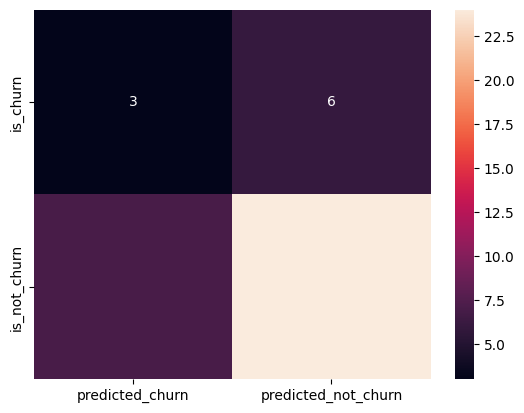

In [9]:
import seaborn as sns
sns.heatmap(confusion, annot=True)

Let's look at first row:
* The first row is for customers whose actual churn value in the test set is $1$.
* As you can calculate, out of $40$ customers, the churn value of $9$ of them is $1$.
* Out of these 15 cases, the classifier correctly predicted $3$ of them as $1$, and $6$ of them as $0$.

This means, for $3$ customers, the actual churn value was $1$ in test set and classifier also correctly predicted those as $1$. However, while the actual label of $6$ customers was $1$, the classifier predicted those as $0$, which is not very good. We can consider it as the error of the model for first row.

What about the customers with churn value $0$? Lets look at the second row:

* It looks like there were $31$ customers whom their churn value were $0$.
* The classifier correctly predicted $24$ of them as $0$, and $7$ of them wrongly as $1$. So, it has done a good job in predicting the customers with churn value $0$.

A good thing about the confusion matrix is that it shows the model’s ability to correctly predict or separate the classes. In a specific case of the binary classifier, such as this example,  we can interpret these numbers as the count of true positives, false positives, true negatives, and false negatives.

In [12]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.77      0.79        31
           1       0.30      0.33      0.32         9

    accuracy                           0.68        40
   macro avg       0.55      0.55      0.55        40
weighted avg       0.69      0.68      0.68        40

